# Logistic Regression for Targeted Advertisements

In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib

Using matplotlib backend: Qt5Agg


## Get the Data

We'll load the dataframe and explore a bit.

In [2]:
ad_data = pd.read_csv('advertising.csv')

In [3]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [5]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis

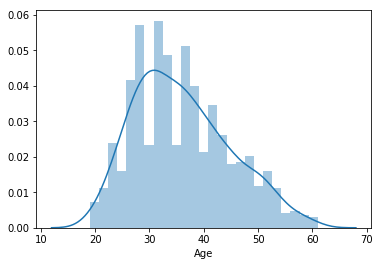

In [6]:
sns.distplot(ad_data['Age'], bins=25)

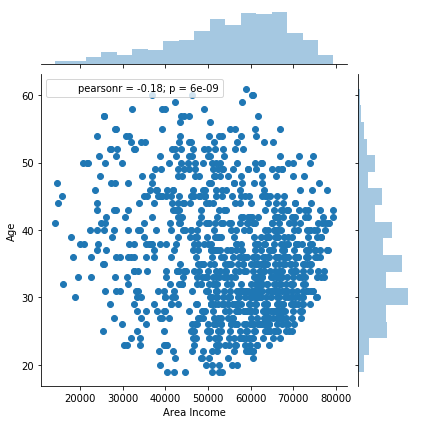

In [7]:
sns.jointplot(ad_data['Area Income'], ad_data['Age'])

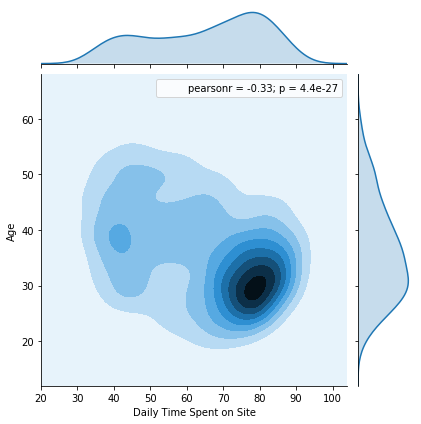

In [8]:
sns.jointplot(ad_data['Daily Time Spent on Site'], ad_data['Age'], kind='kde')

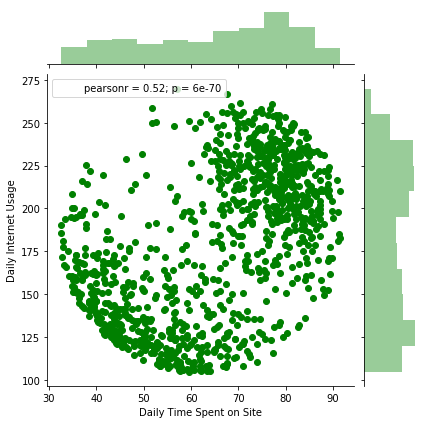

In [9]:
sns.jointplot(ad_data['Daily Time Spent on Site'], ad_data['Daily Internet Usage'], color='g')

There seems to be 2 distinct groups here.

The quickest way to check for correlation and trends is a pairplot. We will now use pairplot to look for trends or correlations. We can do this by setting hue to 'Clicked on Ad', so we can see how the two group differ.

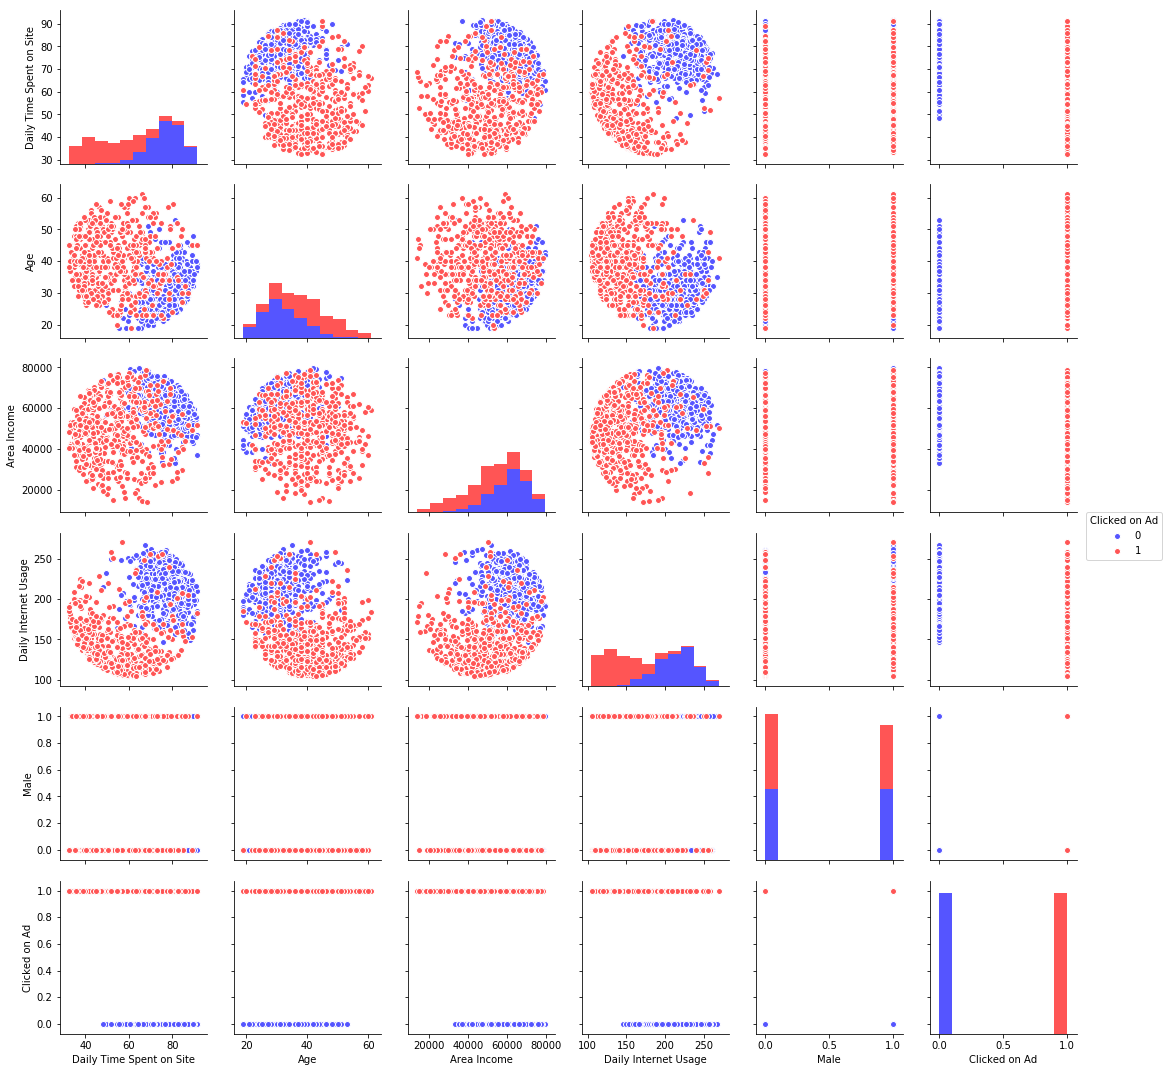

In [10]:
sns.pairplot(ad_data, hue='Clicked on Ad', palette='seismic')

It looks like there are some large, discernable differences between those who've clicked the ad and those who haven't. This is good news - these differences will help our model be successful.

# Logistic Regression

Now it's time to do a train test split, and train our model.

Let's look at the columns and decide which we want to use for training our model.

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
ad_data.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

Let's check how many countries are accounted for in this data.

In [13]:
ad_data['Country'].nunique()

237

237 is too large of a number to use get_dummies on, so we won't include it in our X values.

In [14]:
X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male']]
y = ad_data['Clicked on Ad']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

We will now train and fit a logistic regression model on the training set.

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Now we can predict values for the testing data.

In [18]:
predictions = logmodel.predict(X_test)

In [19]:
logmodel.score(X_test, y_test)

0.8966666666666666

## Classification Report

Now we can test how accurate the model was with a classification report.

In [20]:
from sklearn.metrics import classification_report

In [21]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.85      0.95      0.90       144
          1       0.95      0.85      0.89       156

avg / total       0.90      0.90      0.90       300



Looks like the model does decently well. We can assume that this model could be used for targeted advertisements with success.

Lastly, we can view the confusion matrix.

In [22]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predictions))

[[137   7]
 [ 24 132]]
